In [2]:
import pandas as pd
import pymysql

mysql_connection = pymysql.connect(host='localhost',
                    user='root',
                    password='',
                    db='flights',
                    charset='utf8',
                    cursorclass=pymysql.cursors.DictCursor)            
sql = "SELECT * FROM `flights_temp`"
df = pd.read_sql(sql, mysql_connection) #, index_col='id')

In [3]:
df.head(2)

,icao24,callsign,org_country,lastposupdate,lastcontact,lat,lon,baroaltitude,onground,velocity,...,vertrate,geoaltitude,squawk,time,t,d,ic_ca,first,date,idf
0,500169,T7AIR,San Marino,0,0,36.2764,54.7362,9166.86,0,730.0,...,5.85,8785.86,None,2021-01-20 14:35:50,14:35:50,2021-01-20,500169_T7AIR,500169_T7AIR,2021-01-20,500169_T7AIR_2021-01-20
1,42441b,SVR1518,United Kingdom,1,0,38.0189,55.2986,861.06,0,222.0,...,-3.90,861.06,None,2021-01-20 14:35:50,14:35:50,2021-01-20,42441b_SVR1518,42441b_SVR1518,2021-01-20,42441b_SVR1518_2021-01-20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826764 entries, 0 to 826763
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   icao24         826764 non-null  object         
 1   callsign       826764 non-null  object         
 2   org_country    826764 non-null  object         
 3   lastposupdate  826764 non-null  int64          
 4   lastcontact    826764 non-null  int64          
 5   lat            826764 non-null  float64        
 6   lon            826764 non-null  float64        
 7   baroaltitude   826764 non-null  float64        
 8   onground       826764 non-null  int64          
 9   velocity       826764 non-null  float64        
 10  heading        826764 non-null  float64        
 11  vertrate       826695 non-null  float64        
 12  geoaltitude    799593 non-null  float64        
 13  squawk         26629 non-null   object         
 14  time           826764 non-null  date

In [5]:
idfs = df['idf'].nunique()
idfs

7919

In [16]:
idf = "4243be_SDM5615_2021-01-27"#"42459d_SVR080_2021-01-22"#'155bba_GZP9654_2021-01-27'

In [17]:
y=df[df['idf']==idf]['lat']

In [18]:
x=df[df['idf']==idf]['lon']

In [19]:
len(y)

191

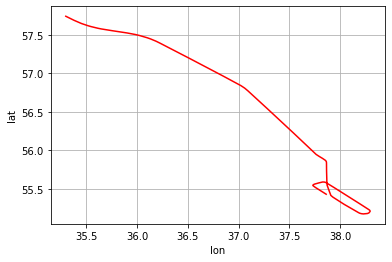

In [9]:
import matplotlib.pyplot as plt
import numpy as np

#xx = np.linspace(0, 1, len(y))
plt.plot(y, x, c='red')
plt.xlabel('lon')
plt.ylabel('lat')
plt.grid(True)
plt.show()

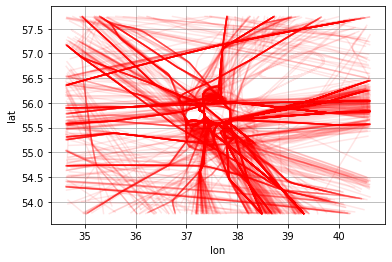

In [11]:
import matplotlib.pyplot as plt
import numpy as np
i = 0
for idf in idfs:
    y=df[df['idf']==idf]['lon']
    #y = df[df['idf']==idf]['velocity']
    #x = np.linspace(0, 1, len(y))
    x=df[df['idf']==idf]['lat']
    plt.plot(x, y, c='red', alpha = 0.1)
    i+=1
    if i == 2000 : break
plt.xlabel('lon')
plt.ylabel('lat')
plt.grid(True)
plt.show()

In [21]:
mysql_connection = pymysql.connect(host='localhost',
                    user='root',
                    password='',
                    db='flights',
                    charset='utf8',
                    cursorclass=pymysql.cursors.DictCursor)
                    
sql = "SELECT * FROM `felab`"
df2= pd.read_sql(sql, mysql_connection) #, index_col='id')

In [22]:
mysql_connection.close()

In [23]:
df2.head(2)

,idf,fdt,ldt,fv,lv,fbh,lbh,llon,llat,flon,...,30lat,70lat,10lon,30lon,70lon,dsh,dd,dv,dg,cat
0,76cdad_SIA308_2021-01-20,2021-01-20 14:35:50,2021-01-20 15:00:20,869.0,854.0,12192.0,13106.4,54.7274,34.6411,54.0266,...,38.4674,36.7021,54.1274,54.3963,54.7330,9.239581,11.124345,7.794739,12.785702,Transit
1,3c70c8_GEC8410_2021-01-20,2021-01-20 14:45:50,2021-01-20 15:11:39,893.0,858.0,10668.0,11277.6,56.0385,40.6003,55.8983,...,36.1109,38.1474,55.9055,55.9256,55.9961,10.178984,7.655415,11.133717,6.388510,Transit


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   idf     3809 non-null   object        
 1   fdt     3809 non-null   datetime64[ns]
 2   ldt     3809 non-null   datetime64[ns]
 3   fv      3809 non-null   float64       
 4   lv      3809 non-null   float64       
 5   fbh     3809 non-null   float64       
 6   lbh     3809 non-null   float64       
 7   llon    3809 non-null   float64       
 8   llat    3809 non-null   float64       
 9   flon    3809 non-null   float64       
 10  flat    3809 non-null   float64       
 11  10bh    3797 non-null   float64       
 12  30bh    3782 non-null   float64       
 13  70bh    3542 non-null   float64       
 14  10v     3797 non-null   float64       
 15  30v     3782 non-null   float64       
 16  70v     3542 non-null   float64       
 17  10lat   3797 non-null   float64       
 18  30lat   

In [15]:
df2 = df2.dropna(how='any',axis=0) 

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3542 entries, 0 to 3805
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   idf     3542 non-null   object        
 1   fdt     3542 non-null   datetime64[ns]
 2   ldt     3542 non-null   datetime64[ns]
 3   fv      3542 non-null   float64       
 4   lv      3542 non-null   float64       
 5   fbh     3542 non-null   float64       
 6   lbh     3542 non-null   float64       
 7   llon    3542 non-null   float64       
 8   llat    3542 non-null   float64       
 9   flon    3542 non-null   float64       
 10  flat    3542 non-null   float64       
 11  10bh    3542 non-null   float64       
 12  30bh    3542 non-null   float64       
 13  70bh    3542 non-null   float64       
 14  10v     3542 non-null   float64       
 15  30v     3542 non-null   float64       
 16  70v     3542 non-null   float64       
 17  10lat   3542 non-null   float64       
 18  30lat   

In [17]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns


(array([2573.,    5.,    3.,    6.,   12.,  614.,  329.]),
 array([  160.02      ,  2009.50285714,  3858.98571429,  5708.46857143,
         7557.95142857,  9407.43428571, 11256.91714286, 13106.4       ]),
 <a list of 7 Patch objects>)

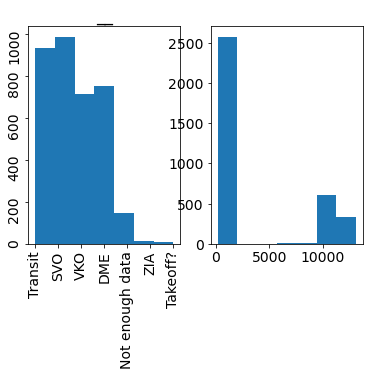

In [18]:
fig, axs = plt.subplots(1, 2)
n_bins = len(df2)
axs[0].tick_params(labelrotation = 90)    #  Поворот подписей
axs[0].hist(df2['cat'], bins=7)
axs[0].set_title('__')
axs[1].hist(df2['lbh'], bins=7)

In [19]:
lb = preprocessing.LabelEncoder()
lb.fit(df2.cat)

LabelEncoder()

In [20]:
df2['Y']= lb.transform(df2.cat)

In [21]:
a=lb.inverse_transform(df2.Y)
a

array(['Transit', 'Transit', 'SVO', ..., 'DME', 'DME', 'DME'],
      dtype=object)

In [22]:
df2.keys()

Index(['idf', 'fdt', 'ldt', 'fv', 'lv', 'fbh', 'lbh', 'llon', 'llat', 'flon',
       'flat', '10bh', '30bh', '70bh', '10v', '30v', '70v', '10lat', '30lat',
       '70lat', '10lon', '30lon', '70lon', 'dsh', 'dd', 'dv', 'dg', 'cat',
       'Y'],
      dtype='object')

In [23]:
kk=['fbh','10bh', '30bh', '70bh',  'fv','10v', '30v', '70v', 'flat', '10lat', '30lat', 
    '70lat', 'flon', '10lon', '30lon', '70lon', 'idf']

In [24]:
df2[df2.keys()[0:-2]]

,idf,fdt,ldt,fv,lv,fbh,lbh,llon,llat,flon,...,10lat,30lat,70lat,10lon,30lon,70lon,dsh,dd,dv,dg
0,76cdad_SIA308_2021-01-20,2021-01-20 14:35:50,2021-01-20 15:00:20,869.0,854.0,12192.00,13106.40,54.7274,34.6411,54.0266,...,39.3400,38.4674,36.7021,54.1274,54.3963,54.7330,9.239581,11.124345,7.794739,12.785702
1,3c70c8_GEC8410_2021-01-20,2021-01-20 14:45:50,2021-01-20 15:11:39,893.0,858.0,10668.00,11277.60,56.0385,40.6003,55.8983,...,35.1355,36.1109,38.1474,55.9055,55.9256,55.9961,10.178984,7.655415,11.133717,6.388510
2,155c0b_AFL1643_2021-01-20,2021-01-20 14:46:00,2021-01-20 15:20:00,756.0,244.0,10363.20,358.14,55.9835,37.4960,53.7601,...,39.1371,38.7446,37.8802,53.9615,54.3676,55.0995,0.007340,0.498688,0.186241,0.565242
3,14fc09_RSD076_2021-01-20,2021-01-20 14:46:30,2021-01-20 15:11:59,715.0,196.0,8709.66,495.30,55.6150,37.3667,53.9245,...,37.2713,37.2850,37.3681,54.2184,54.6565,55.2683,0.135630,0.333561,0.005706,0.567590
4,4d0131_CLX7452_2021-01-20,2021-01-20 14:50:00,2021-01-20 15:16:00,900.0,865.0,9753.60,10363.20,55.5778,34.6268,56.0383,...,40.1433,39.0947,37.1451,56.0336,55.9258,55.5776,7.910586,10.782506,7.104467,12.189997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3801,42438f_PBD577_2021-01-27,2021-01-27 09:14:50,2021-01-27 09:47:40,801.0,827.0,10668.00,10668.00,54.5765,39.4185,57.6898,...,35.2866,35.7497,36.9103,57.4213,56.9827,56.0867,6.004302,2.979729,5.575587,2.660940
3802,4242ee_AFL1307_2021-01-27,2021-01-27 10:16:10,2021-01-27 10:46:40,678.0,271.0,10363.20,480.06,55.9857,37.4940,55.8277,...,40.2650,39.5879,38.3026,55.8144,55.8214,55.9688,0.007019,0.502867,0.187108,0.569597
3803,424283_SBI3034_2021-01-27,2021-01-27 10:39:00,2021-01-27 11:05:30,561.0,251.0,8008.62,350.52,55.4308,37.8605,55.6121,...,40.2811,39.6735,38.4363,55.5794,55.5684,55.6272,0.504984,0.002573,0.352783,0.083465
3804,43be93_SVR094_2021-01-27,2021-01-27 10:46:29,2021-01-27 11:28:10,722.0,224.0,11109.96,358.14,55.4318,37.8593,57.7505,...,38.4644,38.1416,37.7378,57.5842,57.1687,56.3655,0.502807,0.002729,0.351077,0.083825


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df2[df2.keys()[0:-2]], df2.Y, test_size=0.3, random_state=0)

In [26]:
X_train[kk[0:-1]]

,fbh,10bh,30bh,70bh,fv,10v,30v,70v,flat,10lat,30lat,70lat,flon,10lon,30lon,70lon
3117,8740.14,8420.10,7452.36,1729.74,856.0,836.0,798.0,569.0,39.0546,38.8376,38.3294,37.1445,54.0552,54.2856,54.7225,56.0335
2588,10020.30,8671.56,6156.96,2659.38,803.0,790.0,704.0,461.0,34.6810,35.1155,36.7286,38.2166,55.2627,55.3252,55.2515,55.1496
274,10972.80,10972.80,9669.78,5501.64,765.0,758.0,699.0,591.0,39.7606,39.5925,39.2286,38.6068,53.7795,53.9763,54.3958,55.0901
3698,10683.24,10652.76,10668.00,10668.00,804.0,809.0,812.0,799.0,35.6293,35.8559,36.4313,37.4432,57.3565,57.1740,56.6997,55.8292
2897,6576.06,5288.28,2689.86,1272.54,721.0,667.0,562.0,446.0,38.9908,38.7807,38.4589,38.0616,54.1281,54.3712,54.7428,55.4148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,9936.48,8183.88,6774.18,4152.90,754.0,702.0,648.0,636.0,40.5953,40.0664,39.0432,37.5830,55.8279,55.8060,55.7417,55.5133
3506,6637.02,5029.20,3154.68,967.74,714.0,651.0,551.0,403.0,40.6201,40.0843,39.3932,38.3512,55.5996,55.5573,55.4873,55.4512
1768,10172.70,7322.82,4808.22,2049.78,796.0,720.0,643.0,436.0,34.6403,35.4260,36.2592,37.4388,55.7861,55.8710,55.9451,56.2754
2806,7955.28,6530.34,3947.16,1432.56,855.0,809.0,624.0,512.0,34.6368,35.2542,36.2183,37.3703,55.2562,55.3449,55.3145,55.4260


In [27]:
logreg = LogisticRegression(solver = 'sag' , max_iter=10000  ,multi_class= 'ovr')

In [28]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=8)

In [29]:
dtree.fit(X_train[kk[0:-1]], y_train)

DecisionTreeRegressor(max_depth=8)

In [31]:
dtree.feature_importances_ 

array([0.00785639, 0.0950196 , 0.21049857, 0.17316599, 0.00517081,
       0.00539469, 0.00382697, 0.0018806 , 0.00778467, 0.00501211,
       0.08689246, 0.26593398, 0.02029729, 0.01574345, 0.03343392,
       0.0620885 ])

In [32]:
from sklearn import tree
from matplotlib import pyplot as plt

In [33]:
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=6000)
# tree.plot_tree(dtree,
#                feature_names = kk, 
#                filled = True);
# fig.savefig('imagename.png')

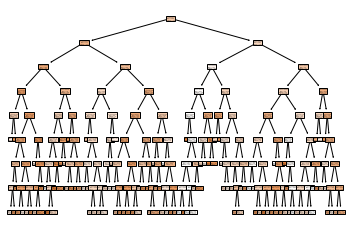

In [38]:
fig=tree.plot_tree(dtree,
                feature_names = kk, 
                filled = True)
plt.show(fig)

In [35]:
plt.savefig('tree.png',format='png',bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

In [36]:
fig.savefig('dtree.png')

AttributeError: 'list' object has no attribute 'savefig'

In [39]:
fig

[Text(162.36740506329116, 205.35999999999999, '70lat <= 37.5\nmse = 3.309\nsamples = 2479\nvalue = 2.69'),
 Text(75.62136075949368, 181.2, '70lon <= 55.704\nmse = 1.871\nsamples = 1060\nvalue = 3.673'),
 Text(34.83085443037975, 157.04, '70bh <= 3070.86\nmse = 1.575\nsamples = 545\nvalue = 4.094'),
 Text(12.978797468354431, 132.88, 'flat <= 34.623\nmse = 1.231\nsamples = 277\nvalue = 4.65'),
 Text(5.29746835443038, 108.72, '10lat <= 35.053\nmse = 3.556\nsamples = 6\nvalue = 2.333'),
 Text(3.178481012658228, 84.56, 'mse = 0.0\nsamples = 4\nvalue = 1.0'),
 Text(7.416455696202532, 84.56, 'mse = 0.0\nsamples = 2\nvalue = 5.0'),
 Text(20.660126582278483, 108.72, '30lat <= 37.249\nmse = 1.058\nsamples = 271\nvalue = 4.701'),
 Text(11.654430379746836, 84.56, '30bh <= 4476.75\nmse = 1.824\nsamples = 123\nvalue = 4.439'),
 Text(6.356962025316456, 60.400000000000006, 'flat <= 36.989\nmse = 3.967\nsamples = 11\nvalue = 3.182'),
 Text(4.237974683544304, 36.24000000000001, '70lat <= 37.344\nmse = 3.

In [910]:
dtee_pred = np.array(np.round(dtree.predict(X_test[kk[0:-1]])), dtype=int)
dtee_pred[0:30]

array([5, 4, 2, 2, 0, 2, 4, 2, 4, 0, 2, 2, 5, 1, 5, 2, 4, 2, 0, 5, 2, 0,
       2, 0, 0, 0, 4, 0, 3, 0])

In [911]:
test_pred_lab_tree=lb.inverse_transform(y_1)
test_pred_lab_tree[0:30]

array(['VKO', 'VKO', 'SVO', 'SVO', 'DME', 'SVO', 'Transit', 'SVO',
       'Transit', 'DME', 'SVO', 'SVO', 'VKO', 'Transit', 'VKO', 'SVO',
       'Transit', 'SVO', 'DME', 'SVO', 'SVO', 'Transit', 'SVO', 'DME',
       'DME', 'DME', 'DME', 'DME', 'VKO', 'DME'], dtype=object)

In [912]:
logreg.fit(X_train[kk[0:-1]], y_train)

LogisticRegression(max_iter=10000, multi_class='ovr', solver='sag')

In [913]:
test_pred = logreg.predict(X_test[kk[0:-1]])
test_pred[0:30]


array([0, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 0, 4, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 4, 2, 0, 0])

In [914]:
test_pred_lab=lb.inverse_transform(test_pred)
test_pred_lab[0:30]

array(['DME', 'Transit', 'SVO', 'SVO', 'SVO', 'SVO', 'Transit', 'SVO',
       'Transit', 'SVO', 'SVO', 'SVO', 'DME', 'Transit', 'SVO', 'SVO',
       'Transit', 'SVO', 'SVO', 'SVO', 'SVO', 'SVO', 'SVO', 'SVO', 'SVO',
       'DME', 'Transit', 'SVO', 'DME', 'DME'], dtype=object)

In [915]:
np.array(y_test[0:30])

array([5, 4, 2, 2, 0, 2, 4, 2, 4, 0, 2, 1, 5, 4, 5, 0, 4, 2, 0, 2, 2, 0,
       2, 0, 0, 0, 4, 0, 5, 0])

In [916]:
lb.inverse_transform(y_test)[0:30]

array(['VKO', 'Transit', 'SVO', 'SVO', 'DME', 'SVO', 'Transit', 'SVO',
       'Transit', 'DME', 'SVO', 'Not enough data', 'VKO', 'Transit',
       'VKO', 'DME', 'Transit', 'SVO', 'DME', 'SVO', 'SVO', 'DME', 'SVO',
       'DME', 'DME', 'DME', 'Transit', 'DME', 'VKO', 'DME'], dtype=object)

In [917]:
len(test_pred_lab)

1063

In [918]:
X_test['reg'] =test_pred_lab

In [919]:
X_test['y'] =lb.inverse_transform(y_test)

In [920]:
X_test['tree'] =lb.inverse_transform(dtee_pred)

In [921]:
key_for_result = ['idf', 'fdt', 'fbh', 'lbh', '70v',  'dsh', 'dd', 'dv', 'dg', 'reg',
       'y', 'tree']

In [922]:
X_test[key_for_result].head(50)

,idf,fdt,fbh,lbh,70v,dsh,dd,dv,dg,reg,y,tree
474,42438b_PBD194_2021-01-23,2021-01-23 15:13:39,9646.92,541.02,575.0,0.135484,0.333643,0.005710,0.567611,DME,VKO,VKO
3428,424387_PBD507_2021-01-22,2021-01-22 09:30:50,10668.00,10668.00,836.0,8.925782,4.976613,7.881456,4.909032,Transit,Transit,Transit
311,155be1_AFL1409_2021-01-21,2021-01-21 06:08:00,9624.06,327.66,467.0,0.005452,0.506440,0.180203,0.578549,SVO,SVO,SVO
3691,155bd3_SDM6262_2021-01-23,2021-01-23 22:59:10,10355.58,388.62,580.0,0.006505,0.501895,0.183619,0.570814,SVO,SVO,SVO
3767,43bea8_SBI2594_2021-01-26,2021-01-26 08:12:10,10005.06,297.18,470.0,0.508461,0.002335,0.355501,0.082910,SVO,DME,DME
1516,424574_AFL1731_2021-01-23,2021-01-23 12:07:20,9441.18,426.72,519.0,0.007340,0.498688,0.186241,0.565242,SVO,SVO,SVO
1146,424392_PBD576_2021-01-24,2021-01-24 13:25:00,10972.80,10972.80,808.0,6.867722,10.597206,6.822017,11.625189,Transit,Transit,Transit
3242,155c0e_AFL1367_2021-01-23,2021-01-23 16:26:20,10363.20,396.24,629.0,0.006457,0.502144,0.183500,0.571191,SVO,SVO,SVO
1890,02013f_RAM3087_2021-01-27,2021-01-27 06:29:40,12192.00,12192.00,847.0,7.881089,11.642349,7.663216,12.811220,Transit,Transit,Transit
338,424420_SBI2566_2021-01-21,2021-01-21 07:03:49,9357.36,213.36,436.0,0.511254,0.002154,0.357668,0.082491,SVO,DME,DME


In [860]:
X_test.loc[]

SyntaxError: invalid syntax (<ipython-input-860-f300b940a8dc>, line 1)

In [599]:
y_pred = logreg.predict(X_train[kk[0:-1]])
lb.inverse_transform(y_pred)[0:20]

array(['SVO', 'SVO', 'SVO', 'Transit', 'DME', 'SVO', 'DME', 'DME',
       'Transit', 'Transit', 'SVO', 'Transit', 'Transit', 'SVO',
       'Transit', 'VKO', 'SVO', 'Transit', 'SVO', 'Transit'], dtype=object)

In [600]:
lb.inverse_transform(y_train)[0:20]

array(['Not enough data', 'DME', 'SVO', 'Transit', 'DME', 'SVO', 'SVO',
       'DME', 'Transit', 'Transit', 'SVO', 'Transit', 'Transit', 'SVO',
       'Transit', 'VKO', 'SVO', 'Transit', 'DME', 'Transit'], dtype=object)

In [602]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test[kk[0:-1]], y_pred[kk[0:-1]])
print(confusion_matrix)

KeyError: "None of [Index(['fbh', '10bh', '30bh', '70bh', 'fv', '10v', '30v', '70v', 'flat',\n       '10lat', '30lat', '70lat', 'flon', '10lon', '30lon', '70lon'],\n      dtype='object')] are in the [index]"

In [261]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: multi_class must be in ('ovo', 'ovr')